In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import textract
from konlpy.tag import *
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import csv
%matplotlib inline

In [2]:
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)

In [3]:
twitter = Okt()

text = ""
morphs = []

df = pd.read_csv('answers.csv', encoding='UTF8')
df['created_at'] = pd.to_datetime(df['created_at'])
# df = df[(df.author_id != 5)]

In [4]:
start_date = pd.Timestamp(2019, 1, 28, 0)
end_date = pd.Timestamp(2019, 4, 1, 0)

mask = (df['created_at'] > start_date) & (df['created_at'] <= end_date)
df = df.loc[mask]

df.head()

,id,author_id,question_id,content,tag_string,created_at,updated_at
0,1,5,236,"오늘 상담쌤과 칭찬에 대한 대화를 나눴다. 내가 애들의 칭찬을 잘 못 믿는, 그리고...",NaN,2019-01-28 14:11:42.543635,2019-01-28 14:11:42.543635
1,2,5,103,원하는 순간에 생각의 흐름을 멈추고 하고자 하는 일에 집중할 수 있는 능력.,NaN,2019-01-28 14:12:09.623446,2019-01-28 14:12:09.623446
2,3,5,98,가만히 공상/유튜브. 혼자 있는 시간.,NaN,2019-01-28 14:13:16.547800,2019-01-28 14:13:16.547800
3,4,5,95,게으름. 그 중에서도 요즘 가장 싫은건 게으름으로 인해 더러워진 방. 너무 짜증나서...,NaN,2019-01-28 14:14:38.838070,2019-01-28 14:14:38.838070
4,6,4,5,진수니랑 같이 프론트 더 멋있게 만들기!!!!!\r\n,NaN,2019-01-28 15:55:14.088330,2019-01-28 15:55:14.088330


In [5]:
content = df.content

for row in content:
    text = row
    if not pd.isna(text):
        morphs.append(twitter.pos(text))

In [6]:
print(morphs)

[[('오늘', 'Noun'), ('상담', 'Noun'), ('쌤', 'Noun'), ('과', 'Josa'), ('칭찬', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('대화', 'Noun'), ('를', 'Josa'), ('나눴다', 'Verb'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('애', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'), ('칭찬', 'Noun'), ('을', 'Josa'), ('잘', 'Verb'), ('못', 'Noun'), ('믿는', 'Verb'), (',', 'Punctuation'), ('그리고', 'Conjunction'), ('믿어도', 'Verb'), ('크게', 'Noun'), ('영향', 'Noun'), ('을', 'Josa'), ('받지', 'Verb'), ('않는', 'Verb'), ('이유', 'Noun'), ('를', 'Josa'), ('말씀드렸는데', 'Verb'), ('이해', 'Noun'), ('가', 'Josa'), ('된다고', 'Verb'), ('하셨다', 'Verb'), ('.', 'Punctuation')], [('원하는', 'Adjective'), ('순간', 'Noun'), ('에', 'Josa'), ('생각', 'Noun'), ('의', 'Josa'), ('흐름', 'Noun'), ('을', 'Josa'), ('멈추고', 'Verb'), ('하고자', 'Verb'), ('하는', 'Verb'), ('일', 'Noun'), ('에', 'Josa'), ('집중', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있는', 'Adjective'), ('능력', 'Noun'), ('.', 'Punctuation')], [('가만히', 'Adverb'), ('공상', 'Noun'), ('/', 'Punctuation'), ('유튜브', 'Noun'), ('.', '

In [17]:
noun_adj_adv_list=[]
 
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and len(word) > 1 and ("생각" not in word) and ("사람" not in word):
#         if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("그" not in word) and ("수"not in word) and("게"not in word)and("말"not in word)and("거" not in word)and("사람" not in word)and("생각" not in word):
            noun_adj_adv_list.append(word)

In [18]:
print(noun_adj_adv_list)

['오늘', '상담', '칭찬', '대한', '대화', '칭찬', '크게', '영향', '이유', '이해', '순간', '흐름', '집중', '능력', '공상', '유튜브', '혼자', '시간', '게으름', '요즘', '가장', '게으름', '오늘', '아침', '세면대', '자취', '수니', '프론트', '만들기', '칭찬', '칭찬', '칭찬', '가장', '원동력', '칭찬', '하루', '종일', '기분', '과장', '친구', '칭찬', '진짜진짜', '정말', '칭찬', '칭찬', '절대', '빈말', '기도', '칭찬', '뭔가', '상대방', '행복', '선물', '수도', '기분', '기도', '자신감', '로또', '당첨', '재능', '재능', '선택', '직감', '선택', '고민', '변명', '하자', '선택', '과정', '처음', '경향', '답정너', '피로', '고민', '과정', '직감', '선택', '일단', '머리', '고민', '안해', '어쩌면', '그대로', '자신감', '것일', '수도', '최근', '드클', '만난', '언니', '얘기', '선택', '조언', '고민', '장점', '정말', '장점', '상대', '편견', '진심', '그대로', '선택', '다른', '의견', '평소', '재원', '최근', '고민', '간만', '아웃', '동시', '시간', '성장', '요즘', '직감', '선택', '고민', '다른', '조언', '하루', '동물', '비유', '유리', '모양', '귀걸이', '대요', '당시', '성취', '가장', '대학', '합격', '사실', '노력', '순간', '엄마', '안고', '입학', '가장', '성취', '지난', '학기', '마지막', '프로젝트', '포스터', '프린터', '순간', '날씨', '여사', '도시', '시간', '오늘', '송도', '어도', '친구', '기분', '대화', '진선', '백방', '멍하니', '보고', '뭔가', '보름달', '정말

In [19]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
words

{'정말': 57,
 '지금': 54,
 '마음': 52,
 '친구': 44,
 '때문': 43,
 '진짜': 42,
 '오늘': 41,
 '시간': 41,
 '가장': 41,
 '하나': 40,
 '사실': 36,
 '경우': 33,
 '기억': 32,
 '겨울': 32,
 '기분': 31,
 '그냥': 31,
 '감정': 30,
 '질문': 29,
 '대한': 28,
 '자신': 28,
 '여름': 28,
 '사랑': 28,
 '어도': 26,
 '칭찬': 25,
 '요즘': 25,
 '정도': 25,
 '인생': 25,
 '다른': 24,
 '행복': 23,
 '조금': 23,
 '고민': 22,
 '보고': 22,
 '순간': 21,
 '항상': 21,
 '세상': 21,
 '수도': 20,
 '사고': 19,
 '계속': 19,
 '이야기': 19,
 '이제': 19,
 '단어': 19,
 '하루': 18,
 '선택': 18,
 '그것': 18,
 '제일': 18,
 '노래': 18,
 '최악': 18,
 '손흥민': 18,
 '매우': 17,
 '문제': 17,
 '아주': 17,
 '모습': 17,
 '이유': 16,
 '얘기': 16,
 '편지': 16,
 '모든': 16,
 '상처': 16,
 '기도': 15,
 '일단': 15,
 '아무': 15,
 '실망': 15,
 '별로': 15,
 '가끔': 15,
 '다시': 15,
 '표현': 15,
 '알바': 15,
 '최근': 14,
 '엄마': 14,
 '어제': 14,
 '느낌': 14,
 '해도': 14,
 '시작': 14,
 '대화': 13,
 '노력': 13,
 '상황': 13,
 '방법': 13,
 '누군가': 13,
 '공부': 13,
 '이해': 12,
 '혼자': 12,
 '아침': 12,
 '머리': 12,
 '가족': 12,
 '내일': 12,
 '영화': 12,
 '다음': 12,
 '대해': 12,
 '관계': 12,
 '수업': 12,
 '우리': 12,
 '의미': 

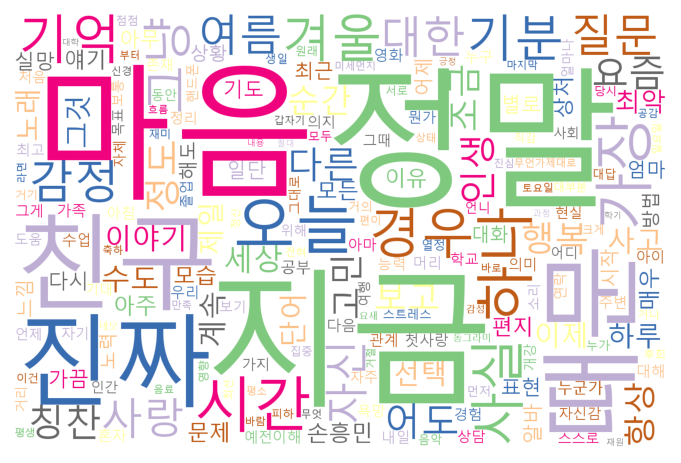

In [20]:
wordcloud = WordCloud(font_path = '../../Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()